# Project Titanic - Machine Learning from Disaster


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('./data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [4]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

##### Notes:
- `Sibsp`: # of siblings / spouses aboard the Titanic
- `Parch`: # of parents / children aboard the Titanic
- `Ticket`: Ticket number
- `Cabin`: Cabin number

In [6]:
# Preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Feature classification: Categorical vs Numerical
- This helps us select the appropriate plots for visualization
#### Which features are categorical ?
- Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
- To classify the samples into sets of similar samples
#### Which features are numerical ?
- Numerical features: `discrete`, `continuous`, or `timeseries`
- These value change from sample to sample

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`
- Numerical: (continuos) `Age`, `Fare`(discrete)
- Mix type of data `Ticket`, `Cabin`
- Contain Error/Typo: `Name`
- Blank or Null: `Cabin` > `Age` > `Embarked`
- Various Data Type: String, Int, Float

In [9]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [11]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
        
convert_cat(train_df, features)
convert_cat(test_df, features)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


### Distribution of Numerical feature values across the samples

In [14]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features

In [15]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)
##### 3.1 Correlating categorical features
- Category: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`
##### Target Variable: Survived

In [16]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [17]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


##### Sex

In [18]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


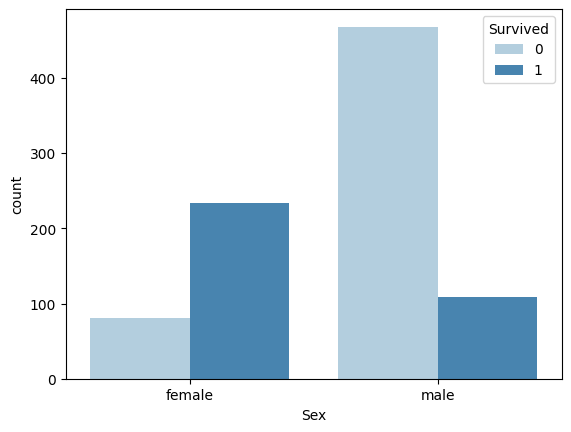

In [19]:
sns.countplot(data=train_df, x='Sex',hue='Survived', palette='Blues');

- Remaining Categorical Feature Columns

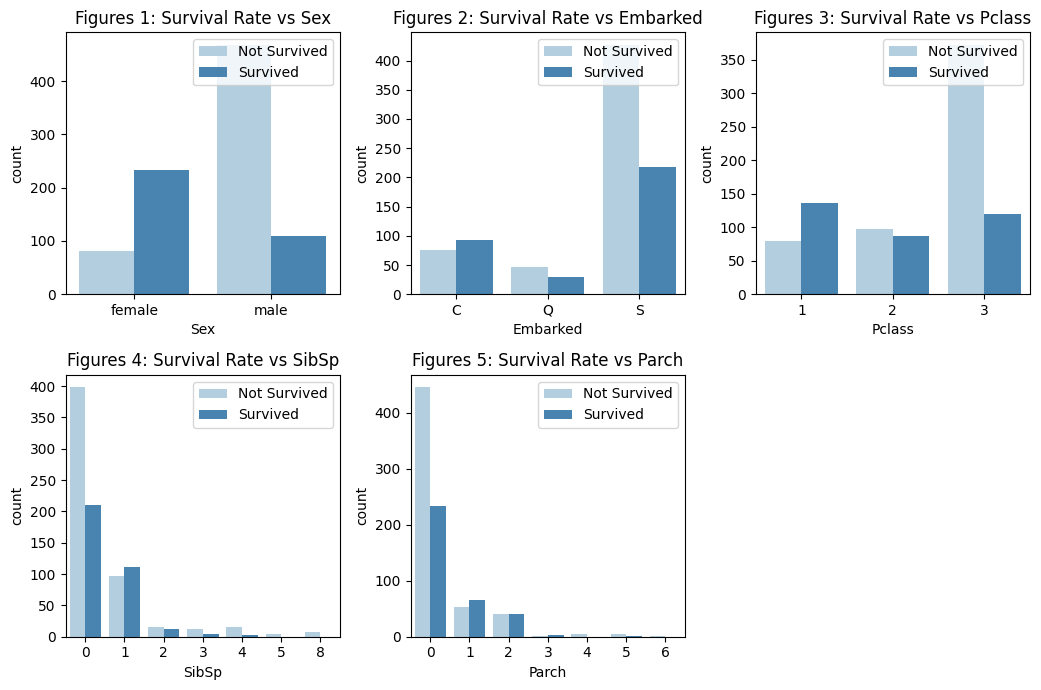

In [20]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c    #index to loop through list 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x = cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figures {i +1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title ='', loc ='upper right', labels =['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)  # Remove the last subplot
plt.tight_layout()
plt.show()

### Observation
##### Survival Rate:
- Fig 1: Female survival rate > male
- Fig 2: Most people embarked on Southampton, and also had the highest people nor survived
- Fig 3: 1st class higher survival rate
- Fig 4: People going with 0 `SibSp` are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
- Fig 5: People going with 0 `Parch` are mostly not survived

### 3.2 EDA for Numerical Features 
- Numerical Features: (continuous) `Age`, `Fare`
##### Age

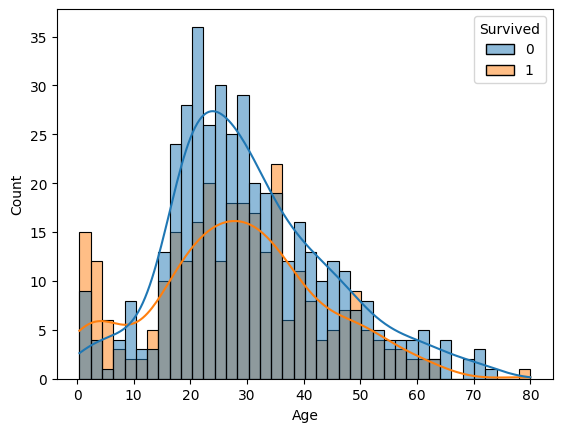

In [21]:
sns.histplot(data=train_df, x= 'Age', hue='Survived', bins=40, kde=True);

- Majority passengers were from 18 - 40 ages
- Children had more chance to survive than other ages

#### Fare

In [22]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

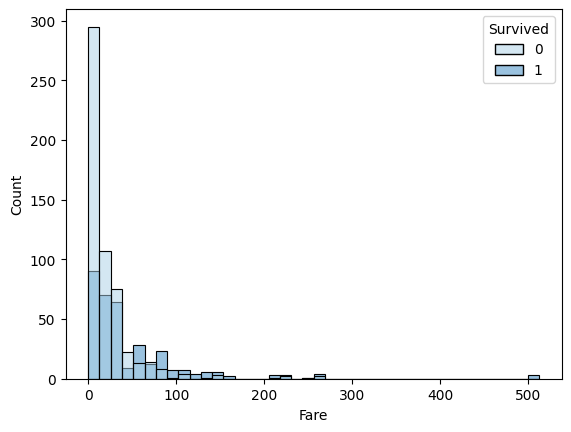

In [23]:
sns.histplot(data=train_df, x ='Fare', bins = 40, hue='Survived', palette='Blues');

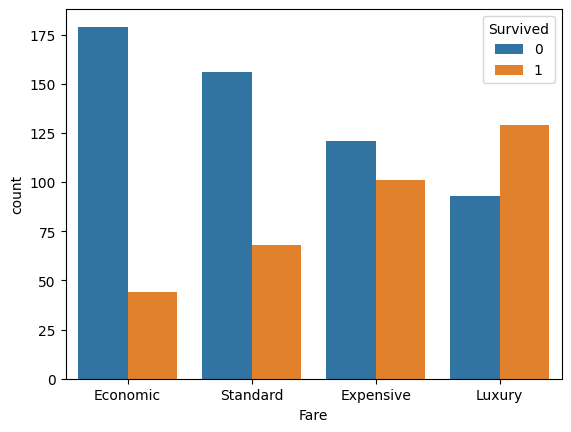

In [24]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_category = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_category)
sns.countplot(x=quartile_data, hue=train_df['Survived']);

#### Distribution of Fare
- Fare does not follow a normal distribution and has a huge spike at the price range (0-100$)
- The distribution is skewed to the left with 75% of the fare paid under $31 and a max paid of $512
#### Quartile plot
- Passenger with Luxury & Expensive Fare will have more chance to survive

## 4. Feature Engineering & Data Wrangling 

#### Name
- Regular Expression

In [26]:
train_df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [33]:
import re  # regular expression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [34]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [35]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [36]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [45]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

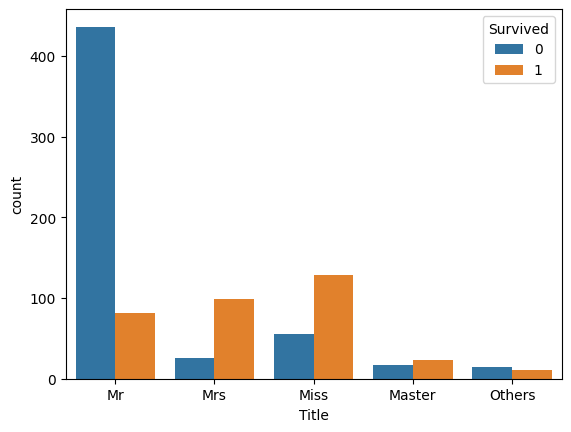

In [44]:
sns.countplot(data=train_df, x = 'Title', hue='Survived');

#### Family
- `SibSp`, `Parch`

In [47]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [57]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0,1], (1,4], (4,6], (6,20]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0,1], (1,4], (4,6], (6,20]

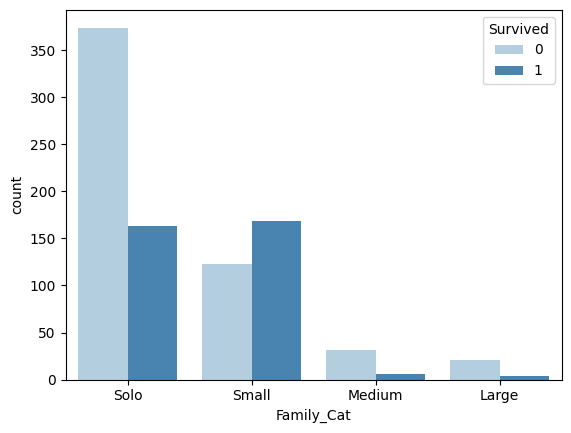

In [52]:
sns.countplot(data=train_df, x = 'Family_Cat', hue='Survived', palette='Blues');

## 4.2 Data Wrangling

In [53]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
features_cols = num_features + cat_features
features_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [58]:
def display_missing(df, features_cols):
    n_rows = df.shape[0]
    for col in features_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Column {col} has {missing_count*100/n_rows:.2f}% missing values")

display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

Column Age has 19.87% missing values
Column Embarked has 0.22% missing values
Column Age has 20.57% missing values
Column Fare has 0.24% missing values


## Filling missing values

#### Age
- Filling missing values with `median` of whole dataset 

In [61]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
age_by_sex_pclass

C:\Users\phanp\AppData\Local\Temp\ipykernel_57796\1121100101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [64]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\phanp\AppData\Local\Temp\ipykernel_57796\3449201259.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
C:\Users\phanp\AppData\Local\Temp\ipykernel_57796\3449201259.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .gro

In [65]:
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

Column Embarked has 0.22% missing values
Column Fare has 0.24% missing values


In [66]:
X = train_df[features_cols]
y = train_df['Survived']

In [67]:
X_test = test_df[features_cols]

In [71]:
# Preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [72]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [73]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [74]:
X = preprocessor.transform(X) # X - > X_Train, X_val

In [75]:
X_test = preprocessor.transform(X_test)

In [76]:
from sklearn.model_selection import train_test_split
X_Train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)